<center>
<h1> Assignment 0: Hello Jupyter!</h1>
</center>
<center>
CS 4262/5262 - Foundations of Machine Learning<br>
Vanderbilt University, Spring 2024<br>
Due: Check Brightspace
</center>
<hr>
<br>For this first assignment, you will be guided through basic examples and will play with simple data visualizations. In addition to code (marked with #TODO), there are some short-answer questions in bold throughout the notebook. 

Don't hesitate to ask for help! Also, please let us know if you need any clarifications about this material or submission.

The assignments for CS 4262/5262 will be submitted as Jupyter Notebooks. 

We strongly recommend that you install **Anaconda** for ease of use. <br>Note: Assignments are created in Python 3.10, other versions may be incompatible.

In [8]:
### Please enter your name:  Yuanhe Li

---
## Part 1: Visualization 

In this portion of the assignment, we have provided some visualization examples to get you started, and have left some for you to figure out.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [10]:
# Load an example dataset
penguins = sns.load_dataset("penguins")
# The dataset loads in the form of a dataframe where each column is a variable and each row is an observation.
# Let's take a look at the first 5 rows.
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [11]:
# Let's look at some summary statistics:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


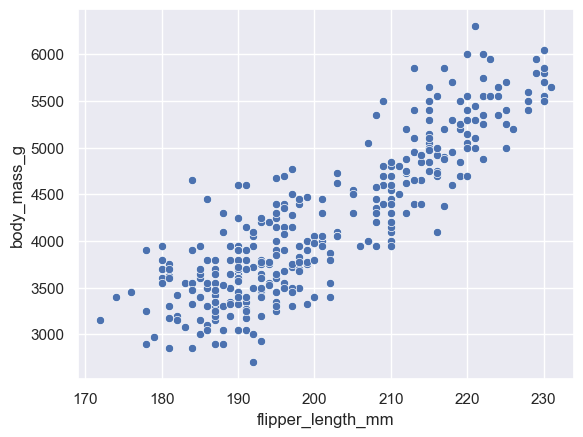

In [12]:
# Is there a linear relationship? Let's visualize flipper_length_mm vs. body_mass_g.
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", data=penguins)
plt.show()

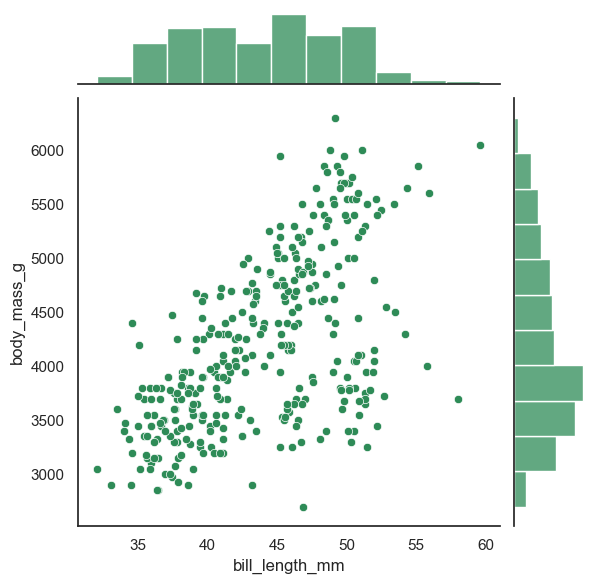

In [13]:
# What about the relationship between bill length and body mass 
# Let's plot the data as a scatter plot and distributions over the variables
with sns.axes_style('white'):
    sns.jointplot(x="bill_length_mm", y="body_mass_g", kind='scatter',
                  color='seagreen',
                  data=penguins)

/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


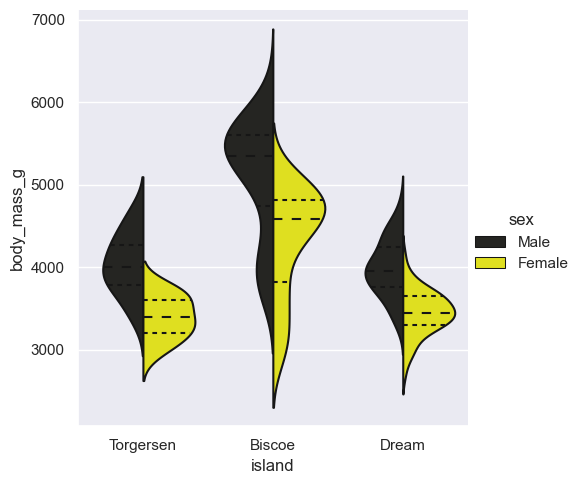

In [15]:
# With seaborn we can visualize more complex relationships such as 
# the complex relationship between gender, island and body mass. Fun!
sns.catplot(x="island", y="body_mass_g", hue="sex", kind="violin",
            split=True, inner='quart', palette='dark:yellow',
            data=penguins)
plt.show()

### Now it is your turn!
Below you will find examples from the penguins dataset and a new dataset -fmri.

<Axes: xlabel='body_mass_g', ylabel='Count'>

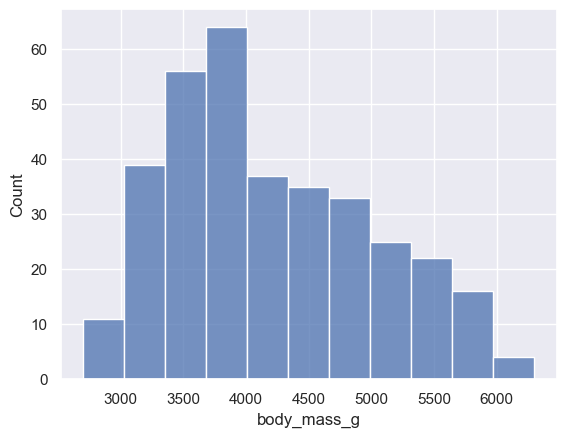

In [16]:
# TO DO
# Visualize the penguin body mass distribution (histogram)
sns.histplot(data=penguins, x="body_mass_g")

In [17]:
# Load the fmri dataset
fmri = sns.load_dataset("fmri")
# TO DO
# Display the LAST 10 rows of this dataset
fmri.tail(10)

,subject,timepoint,event,region,signal
1054,s5,8,cue,frontal,-0.028292
1055,s4,8,cue,frontal,-0.160821
1056,s3,8,cue,frontal,-0.033848
1057,s2,8,cue,frontal,-0.069666
1058,s1,8,cue,frontal,-0.136059
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367
1063,s0,0,cue,parietal,-0.006899


In [18]:
# TO DO
# Display summary statistics of this dataset (mean, std, etc.)
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [23]:
# TO DO
# filter your dataframe for subject s2 (hint: select the rows that correspond to this subject)

s2 = fmri[fmri['subject'] == "s2"]
# And now take a look at the first 5 rows
s2.head()

,subject,timepoint,event,region,signal
12,s2,18,stim,parietal,-0.086623
26,s2,17,stim,parietal,-0.077292
40,s2,16,stim,parietal,-0.064998
54,s2,15,stim,parietal,-0.055462
82,s2,13,stim,parietal,-0.052656


/Users/apple/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


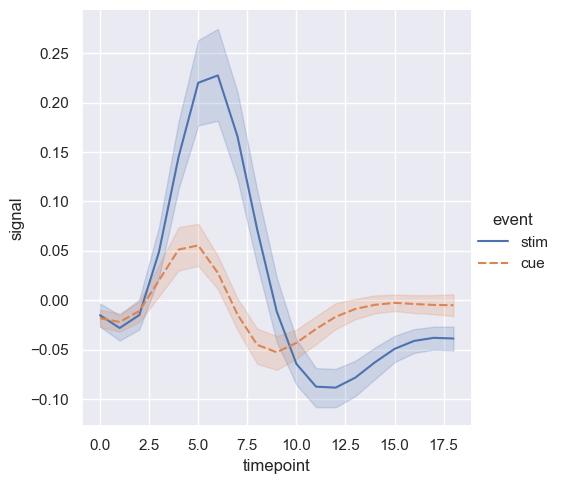

In [25]:
# TO DO
# For subject s2, plot the signal (mean and shaded standard dev) for different event types (cue, stim). Use different visual channels 
# (hue, style, etc.) for each event type. hint: you can try "relplot" and do this in one line of code

sns.relplot(x='timepoint', y='signal', hue='event', style='event', kind='line', data=fmri)

#### Your plot should look something like this.

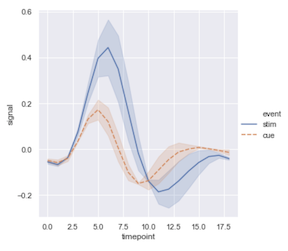

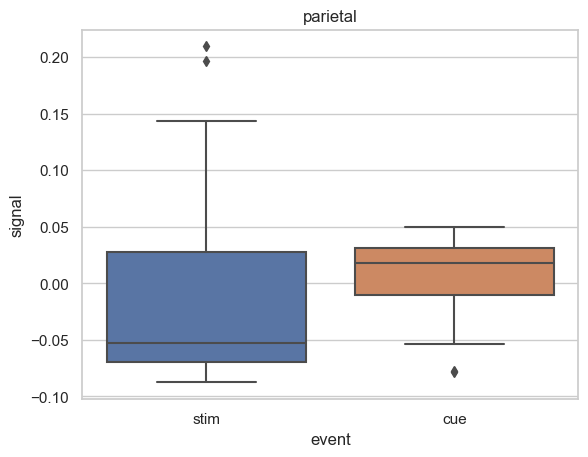

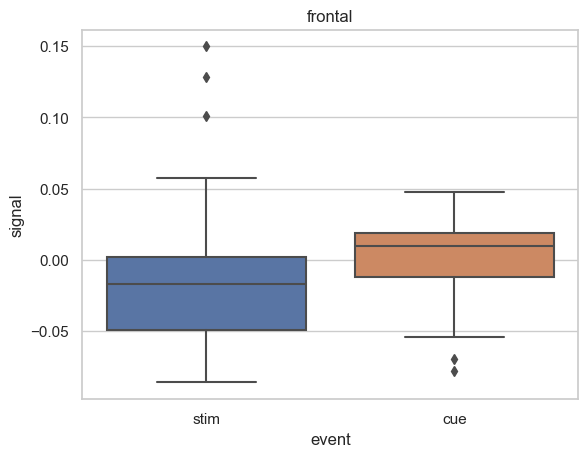

In [41]:
# TO DO
# for each brain region, make a figure that plots the signal for different event types,
# using only the data from subject s2.

# Get unique regions
regions = s2['region'].unique()

# Loop through each region and create a plot for it
for region in regions:
    # Filter the dataframe for the current region
    data_region = s2[s2['region'] == region]

    # Draw the plot.
    sns.boxplot(x='event', y='signal', data=data_region)
    
    # Give it a title
    plt.title(region)
    
    # Show the plot
    plt.show()

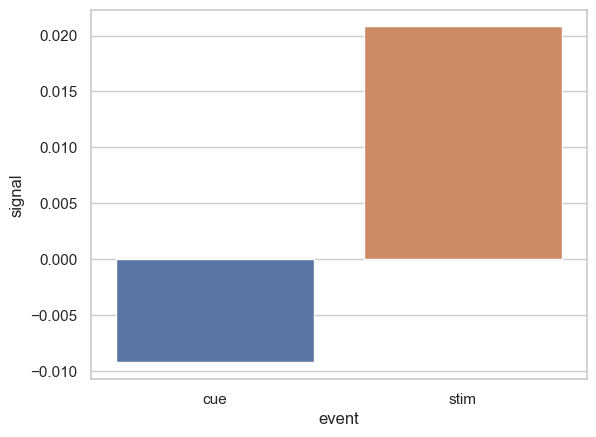

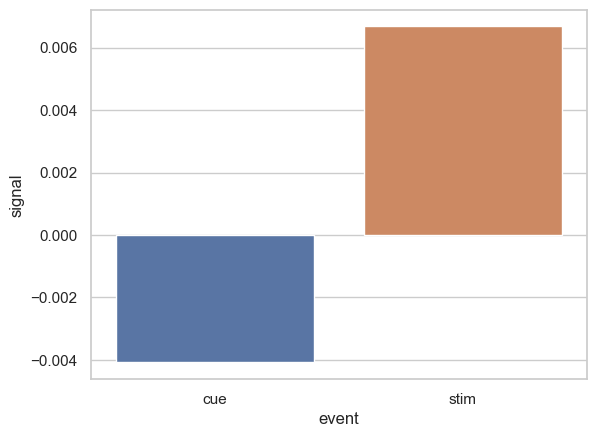

In [58]:
# TO DO
# for each brain region, make a figure that plots the signal for each event type, averaged across all subjects.

# It'll be a histogram with event as x, its averaged value as y.

# First, get all region types
all_regions = fmri['region'].unique()

for region in all_regions:
    
    # Find all data of current region
    dataset = fmri[region == fmri['region']]
    
    # Find the mean of the dataset
    dataset_mean = dataset.groupby('event')['signal'].mean().reset_index()

    # Plot the data
    sns.barplot(x='event', y='signal', data=dataset_mean)
    
    # Show the plot
    plt.show()

---
## Part 2: Free Exploration

In this part of the assignment, pick a dataset and let your inner explorer/scientist run wild! Above we have explored 2 different datasets from seaborn library, here are some more https://github.com/mwaskom/seaborn-data.
1. Pick and explore a dataset from the above list.
2. Use the seaborn library (https://seaborn.pydata.org), visualize 2 complex <br> relationships (not just x vs. y, see above example split violin plot) of your choice,
3. **Explain why you chose these visualizations and how it helped you understand your data.** 

In [5]:
# TO DO 
# Load and explore a dataset

In [6]:
# TO DO
# Figure 1:

In [7]:
# TO DO 
# Figure 2:

---
## Part 3: Submission 

Once you're ready to submit, create a 'clean' version of your final solutions, removing any extra debugging code you may have written. Next, in the menu bar, click `Kernel > Restart & Clear Output`. Then run your code from top to bottom, so that all the plots are displayed. Back in the menu bar, click `File > Download as > Notebook (.ipynb)` to download your notebook. Don't forget to answer the short answer questions. 

Please upload your Notebooks (.ipynb) to Brightspace by the deadline.